In [1]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target

In [3]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y,columns=['Species'])

In [4]:
def flower(num):
    if num ==0:
        return 'Setosa'
    elif num ==1:
        return 'Versicolour'
    else:
        return 'Virginica'
iris_target['Species'] = iris_target['Species'].apply(flower)

In [5]:
iris = pd.concat([iris_data,iris_target],axis = 1)
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


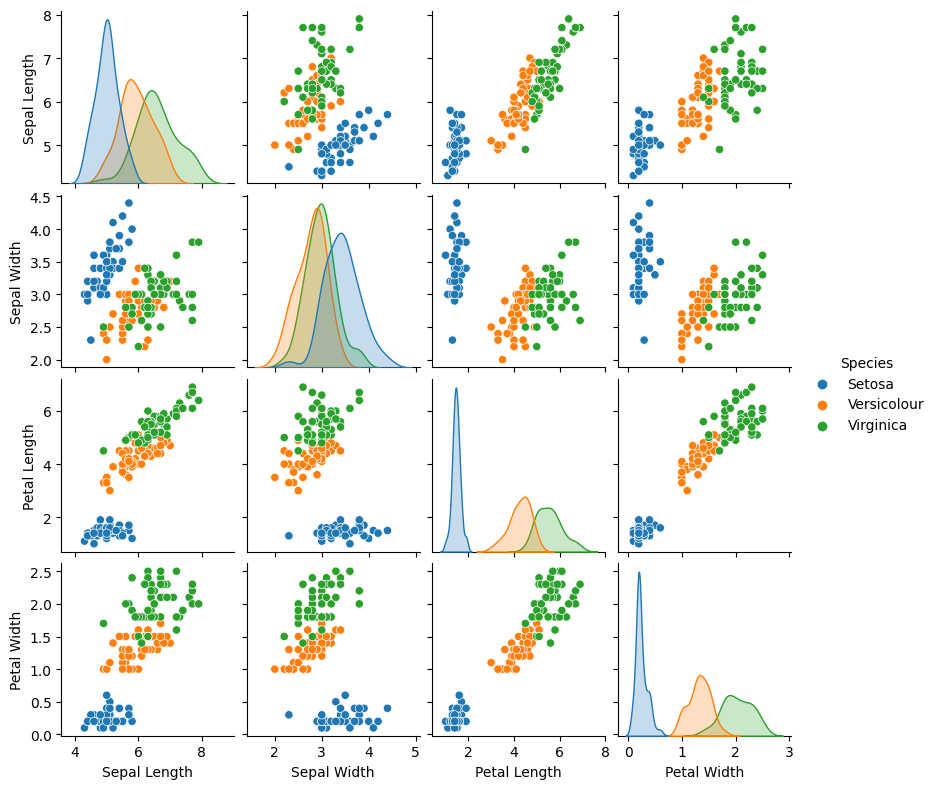

In [6]:
sns.pairplot(iris,hue='Species',height=2)

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,random_state=3)

In [8]:
logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train,Y_train)

LogisticRegression(max_iter=150)

In [9]:
Y_pred = logreg.predict(X_test)

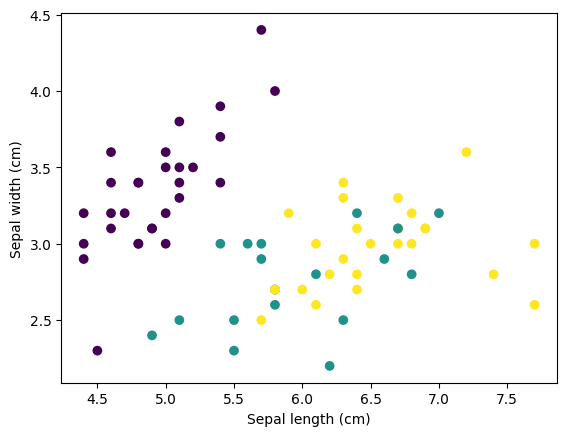

In [10]:
L1 = [n[0] for n in X_test]
L2 = [n[1] for n in X_test]
plt.scatter(L1,L2, c=Y_pred)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

In [11]:
report = metrics.classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.87      0.93        23
           2       0.88      1.00      0.94        23

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [12]:
ovo_lr = OneVsOneClassifier(LogisticRegression())
ovo_lr.fit(X_train, Y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [13]:
Y_ovo_pred = ovo_lr.predict(X_test)

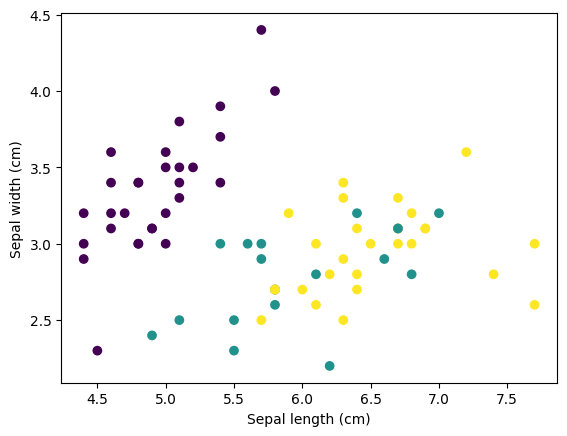

In [14]:
L1 = [n[0] for n in X_test]
L2 = [n[1] for n in X_test]
plt.scatter(L1,L2, c=Y_ovo_pred)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

In [15]:
report = metrics.classification_report(Y_test, Y_ovo_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.83      0.90        23
           2       0.85      1.00      0.92        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



In [16]:
ova_lr = OneVsRestClassifier(LogisticRegression())
ova_lr.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [17]:
Y_ova_pred = ova_lr.predict(X_test)

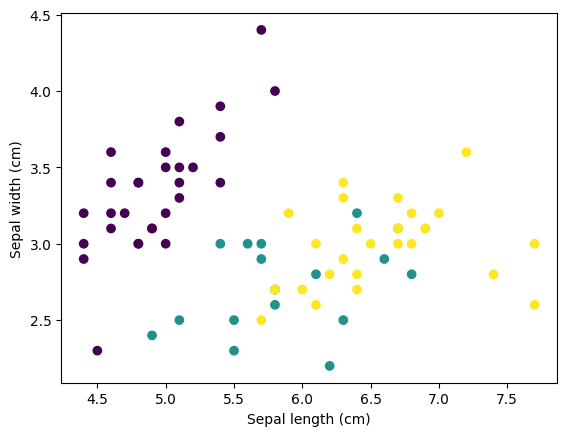

In [18]:
L1 = [n[0] for n in X_test]
L2 = [n[1] for n in X_test]
plt.scatter(L1,L2, c=Y_ova_pred)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

In [19]:
report = metrics.classification_report(Y_test, Y_ova_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.78      0.88        23
           2       0.82      1.00      0.90        23

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.95      0.93      0.93        75

